# TERM FREQUENCY(TF) & INVERSE DOCUMENT FREQUENCY(IDF)

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It's a widely used technique in Natural Language Processing (NLP) for feature extraction and plays a crucial role in various **applications** like **search engines, text classification, and information retrieval.**

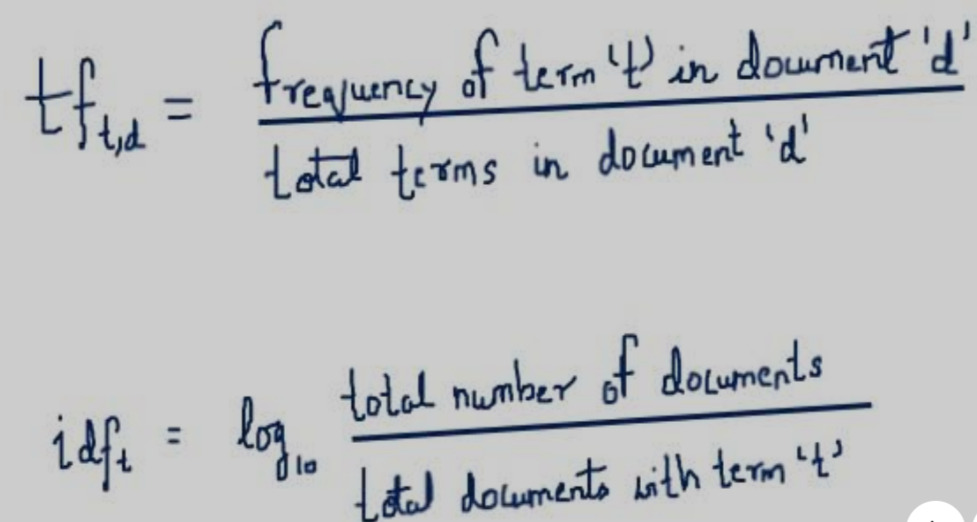

**TF-IDF Calculation**: The TF-IDF score for a term is calculated by multiplying its TF and IDF values

    TF-IDF = TF * IDF 

For example, if the TF is 0.05 and the IDF is 2, the TF-IDF score is 0.05 * 2 = 0.1

**Reducing the impact of common words:**
Common words like "the," "a," and "is" often have high TF but low IDF, resulting in lower TF-IDF scores. This helps to filter out noise and focus on more meaningful terms.

In [1]:
import nltk

In [2]:
import re

In [3]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""            


In [4]:
from nltk.corpus import stopwords

In [5]:
corpus = []

In [6]:
from nltk.stem import WordNetLemmatizer

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
sentences =  nltk.sent_tokenize(paragraph)

In [9]:
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i]) #substitute characters other than a-z or A-Z with ' '(Spaces) and ^ represents to not
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
print(corpus)

['three vision india', 'year history people world come invaded u captured land conquered mind', 'alexander onwards greek turk mogul portuguese british french dutch came looted u took', 'yet done nation', 'conquered anyone', 'grabbed land culture history tried enforce way life', '', 'respect freedom others first vision freedom', 'believe india got first vision started war independence', 'freedom must protect nurture build', 'free one respect u', 'second vision india development', 'fifty year developing nation', 'time see developed nation', 'among top nation world term gdp', 'percent growth rate area', 'poverty level falling', 'achievement globally recognised today', 'yet lack self confidence see developed nation self reliant self assured', 'incorrect', 'third vision', 'india must stand world', 'believe unless india stand world one respect u', 'strength respect strength', 'must strong military power also economic power', 'must go hand hand', 'good fortune worked three great mind', 'dr vi

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.25883507 0.30512561 0.        ]
 [0.         0.28867513 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Bag of Words and TF-IDF Problems

1) For both approaches, semantic info is not stored.TF-IDF gives importance to uncommon words.

2) There is definitely chance of overfitting.

To resolve these 2 problems we use word2vec